(7728394, 46)
Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


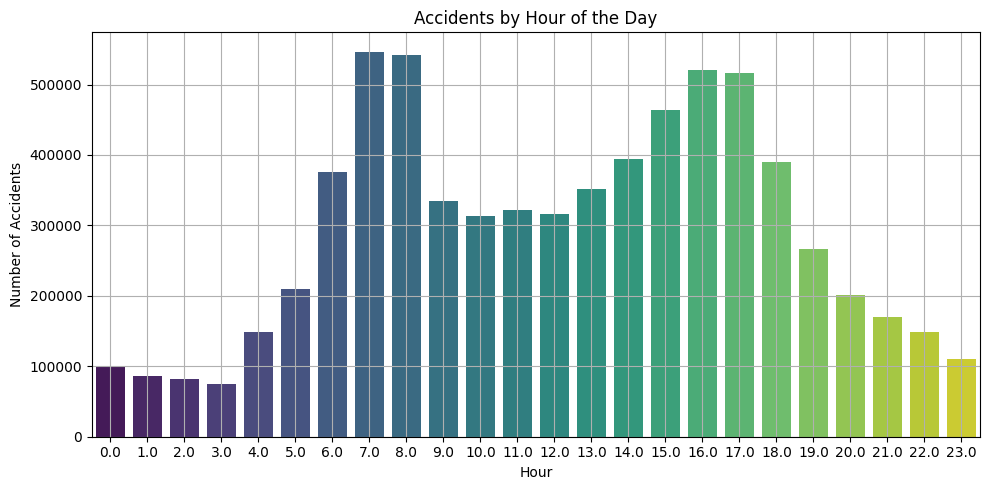

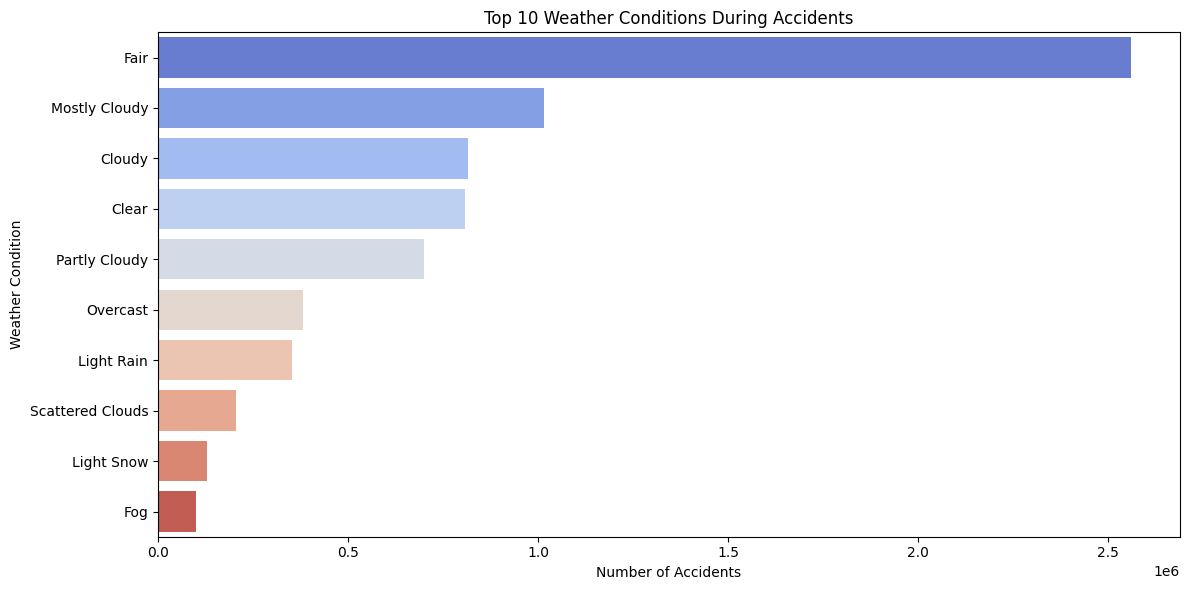

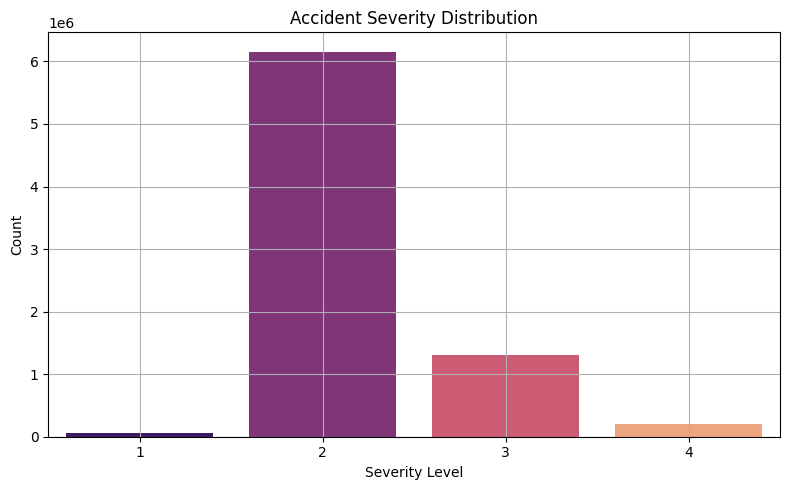

✅ Hotspot heatmap saved as 'Accident_Hotspots_Map.html'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

# Preview
print(df.shape)
print(df.columns)

# --- Preprocessing ---
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

# --- 1. Accidents by Time of Day ---
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2. Weather Conditions ---
plt.figure(figsize=(12,6))
top_weather = df['Weather_Condition'].value_counts().head(10)
sns.barplot(x=top_weather.values, y=top_weather.index, palette='coolwarm')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

# --- 3. Road Conditions (Severity Analysis) ---
plt.figure(figsize=(8,5))
sns.countplot(x='Severity', data=df, palette='magma')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4. Heatmap of Accident Hotspots ---
heatmap_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)  # Sample to avoid overload

# Create a base map
m = folium.Map(location=[39.5, -98.35], zoom_start=4)  # Center of USA

# Add heatmap
HeatMap(heatmap_df.values, radius=8).add_to(m)

# Save to HTML
m.save("Accident_Hotspots_Map.html")
print("✅ Hotspot heatmap saved as 'Accident_Hotspots_Map.html'")
